Irises (Setosa, Versicolour, and Virginica) 
Implementing: Logistic Regression and K Nearest Neighbors 

In [2]:
#standard importing
import os

#third party importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
df = pd.read_csv('Iris.csv')
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
#displaying columns
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#deleting unecessary column 
df=df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#displaying overview of the project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#removing null
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#exploratory Data Analysis
colors = ['red','orange','blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

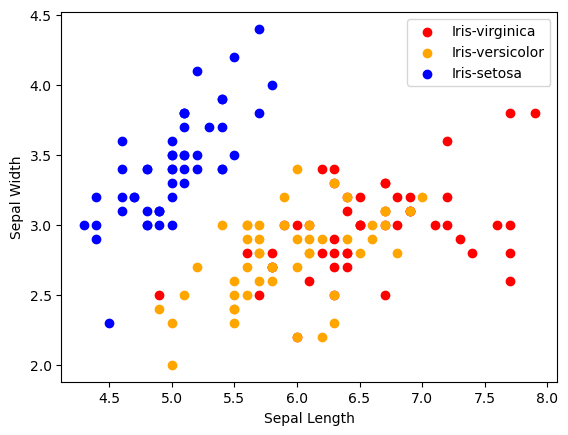

In [13]:
for i in range(3): #species is a list of 3 species (['Setosa','Versicolor','Virginica']) 
                    #and colors is a list of 3 colors ( ['red','green','blue'])
    x = df[df['Species'] == species[i]] #Filters the df to only rows where the Species column matches species[i].
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

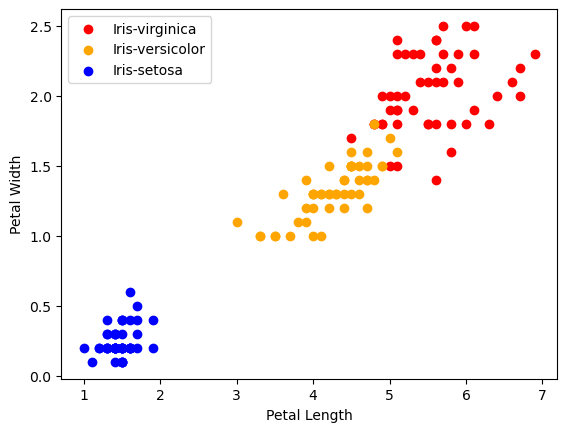

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

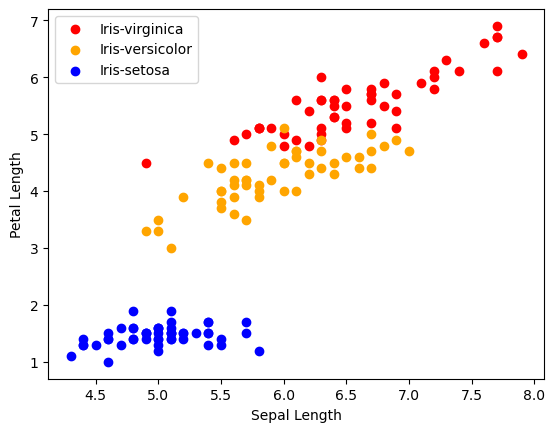

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

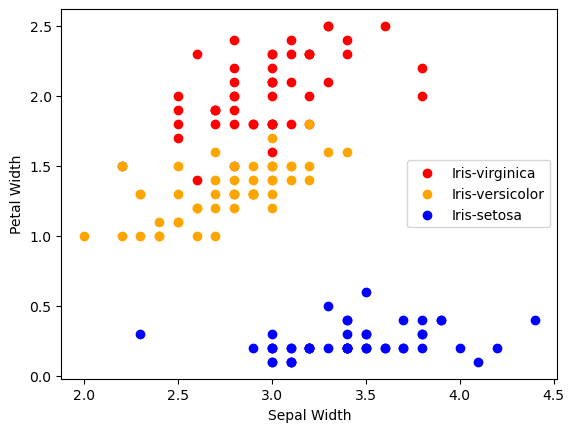

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

Here we can see, iris-setosa is easily separable from the other 2 classes

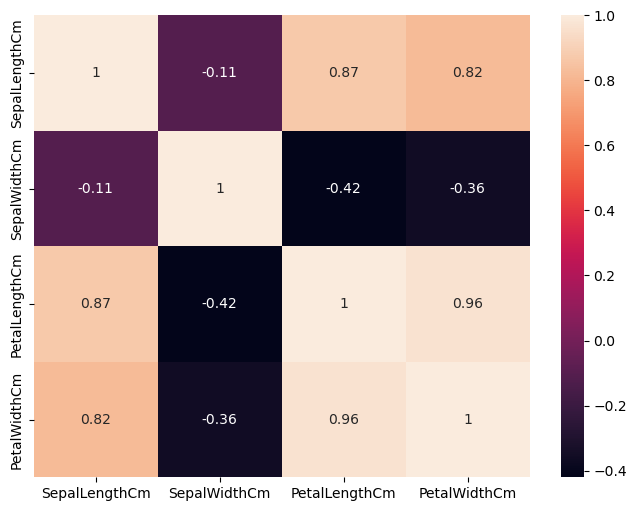

In [17]:
#checking the coorelation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.show()

1. Petal length and petal width have high positive correlation of 0.96
* Longer petals usually also mean wider petals in Iris flowers
2. Sepal length have high positive correlation with petal length and petal width
* Flowers with longer sepals tend to have longer and wider petals.
3. Sepal width have negative correlation with petal length and petal width
* Flowers with wider sepals tend to have shorter and narrower petals, on average.

In [29]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
# using model training
from sklearn.model_selection import train_test_split
# train 70, test 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.30 )

In [32]:
# using Logistic Regression
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression  (max_iter=200)  # increase max_iter to avoid convergence warnings
#train data
LRmodel.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [33]:
# checking accuracy with the Logistic Regression test 
accuracy = LRmodel.score(x_test, y_test) * 100
print("Test Accuracy:", accuracy)

Test Accuracy: 97.77777777777777


In [34]:
# My sample for LR
# Encode species as numbers
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df['Species_num'] = df['Species'].map(species_map)

my_flower = [[6.1, 3.0, 6.1, 1.4]]  # [SepalLength, SepalWidth, PetalLength, PetalWidth]
pred_num = LRmodel.predict(my_flower)

# Round to nearest integer and map back to species
pred_class = int(round(pred_num[0]))
reverse_map = {v: k for k, v in species_map.items()} #species_map maps species names to numbers
pred_species = reverse_map[pred_class] #Looks up the integer prediction in reverse_map and gives the actual species name.

print("Predicted numeric value:", pred_num[0])
print("Predicted Species:", pred_species)

Predicted numeric value: 2
Predicted Species: Iris-versicolor


/Applications/college/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Why Linear Regression
* LR is used to predict categorical outcomes such as in Iris the target is Species, so it predicts the probabilty of each class based on feature
* Works well when classes are linearly separable such as If features like Petal Length and Petal Width separate species nicely, LR can draw decision boundaries between species.

In simple, 
Imagine you have a flower and you want to guess its species based on measurements like Petal Length and Petal Width.
Logistic Regression doesn’t just say “this flower is Iris-setosa” it gives a probability for each species. Probabilty or Likely here means Iris-setosa has 5% probality, Iris-versicolor has 80% 

* Logistic Regression turns the measurements of a flower into “likelihoods” for each species, and usually pick the species with the highest likelihood.

In [35]:
# using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
#checking accuracy with the K Nearest Neighbors test 
accuracy = KNNmodel.score(x_test, y_test) * 100
print("Test Accuracy:", accuracy)

Test Accuracy: 95.55555555555556


In [37]:
# My sample for LR
# My flower sample
my_flower = [[6.1, 3.0, 6.1, 1.4]]
pred_species_num = KNNmodel.predict(my_flower)[0]
pred_species_name = reverse_map[pred_species_num]

print("Predicted numeric value:", pred_species_num)
print("Predicted Species:", pred_species_name)

Predicted numeric value: 2
Predicted Species: Iris-versicolor


/Applications/college/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Why KNN 

* Clear Cluster such as Iris-setosa, versicolor, virginica
* Useful if classes overlap or have non-linear boundaries. Iris species aren’t always perfectly separated by a straight line.

In simple, Imagine you are in a garden with many flowers, and you want to guess the species of a new flower.You see which species is most common among those nearest flowers.You assign the new flower to that species (majority vote).

* KNN predicts the class of a sample by looking at its closest neighbors in the feature space and taking a majority vote.